<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/EVA5_Assignment13A_Yolo_SingleImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/My Drive/eva5/ass13')
!ls

coco-2014-1.1.0.png
coco.names
custom
GEM_Edible-Vineyard_Dining-Table_05.jpg
giraffe-small.png
small-Construction_Safety_Training_Video_360p.mp4-.mp4
testvideo.mp4
testvid.zip
visual-question-answering.aa6ecaa1.jpg
YoloV3
yolov3.cfg
YoloV3_Dataset.zip
yolov3-spp-ultralytics.pt
yolov3.weights


In [ ]:
#! wget "https://pjreddie.com/media/files/yolov3.weights"


In [4]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
# Loading image
img = cv2.imread("visual-question-answering.aa6ecaa1.jpg")#giraffe-small.png")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [6]:
height, width

(318, 480)

In [7]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [8]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [9]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

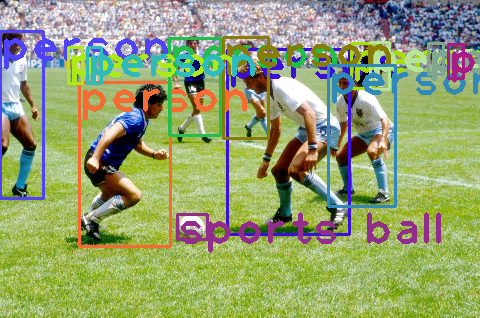

In [10]:
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()